In [51]:
from kloppy import sportec

#event_dataset = sportec.load_open_event_data(match_id="J03WN1")
#events = impect.load_open_data(match_id=122840)

In [8]:
# gets specific event (in this case, goal)
goal_event = event_dataset.get_event_by_id("18226900000272")
print(goal_event)
print(goal_event.player)

<ShotEvent event_id='18226900000272' time='P1T18:04' team='VfL Bochum 1848' player='P. Förster' result='GOAL'>
P. Förster


In [11]:
# uses prev/next to move to forwards/backwards from plays (can also distingush action type as seem below)
assist_event = goal_event.prev("pass.complete")
print(assist_event)

post_goal_event = goal_event.next()
print(post_goal_event)

next_shot_event = goal_event.next("shot")
print(next_shot_event)

<PassEvent event_id='18226900000271' time='P1T18:00' team='VfL Bochum 1848' player='T. Asano' result='COMPLETE'>
<PassEvent event_id='18226900000273' time='P1T19:13' team='Bayer 04 Leverkusen' player='S. Azmoun' result='COMPLETE'>
<ShotEvent event_id='18226900000281' time='P1T19:33' team='VfL Bochum 1848' player='A. Losilla' result='OFF_TARGET'>


In [13]:
# iterating within data structures
shot_events = event_dataset.find_all("shot")
goal_events = event_dataset.find_all("shot.goal")
print(shot_events[0])
print(shot_events[0].qualifiers)
print(shot_events[0].qualifiers[0].value)

<ShotEvent event_id='18226900000020' time='P1T00:52' team='Bayer 04 Leverkusen' player='S. Azmoun' result='BLOCKED'>
[BodyPartQualifier(value=<BodyPart.RIGHT_FOOT: 'RIGHT_FOOT'>)]
BodyPart.RIGHT_FOOT


Text(0.5, 0.5, 'P1T18:04 - Goal by P. Förster (VfL Bochum 1848)')

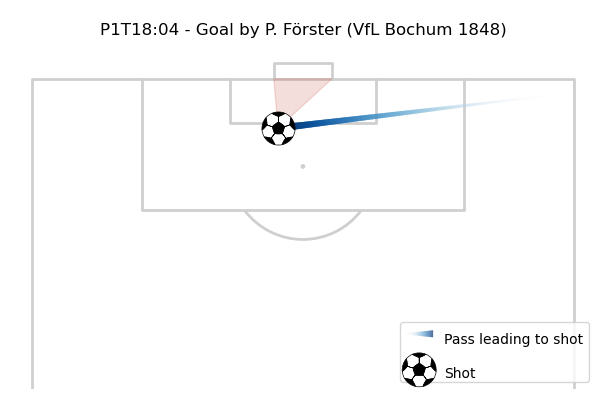

In [17]:
import matplotlib.pyplot as plt
from mplsoccer import VerticalPitch
from kloppy.domain import PositionType

# Setup the pitch
pitch = VerticalPitch(
    half=True, goal_type='box', pad_bottom=-.2,
    line_color="#cfcfcf",
    line_zorder=1,
    pitch_type="metricasports",
    pitch_length=event_dataset.metadata.pitch_dimensions.pitch_length,
    pitch_width=event_dataset.metadata.pitch_dimensions.pitch_width,
)

# We will use mplsoccer's grid function to plot a pitch with a title axis.
fig, axs = pitch.grid(
    figheight=4, endnote_height=0,  # no endnote
    title_height=0.1, title_space=0.02,
    # Turn off the endnote/title axis. I usually do this after
    # I am happy with the chart layout and text placement
    axis=False,
    grid_height=0.83
)

# Plot the goal angle
pitch.goal_angle(
    1-assist_event.receiver_coordinates.x, 1-assist_event.receiver_coordinates.y,
    alpha=0.2, zorder=1.1, color='#cb5a4c', goal='right', ax=axs['pitch']
)
# Plot the assist
pitch.lines(
    1-assist_event.coordinates.x, 1-assist_event.coordinates.y,
    1-assist_event.receiver_coordinates.x, 1-assist_event.receiver_coordinates.y,
    lw=5, transparent=True, comet=True, cmap='Blues', zorder=1.2,
    label='Pass leading to shot', ax=axs['pitch']
)
# Plot the shot
pitch.scatter(
    1-assist_event.receiver_coordinates.x, 1-assist_event.receiver_coordinates.y,
    s=600, marker="football", zorder=1.3, label='Shot', ax=axs['pitch']
)

# Add a legend and title
legend = axs['pitch'].legend(loc='lower right', labelspacing=1.5)
for text in legend.get_texts():
    text.set_fontsize(10)
    text.set_va('center')

# Add a title
axs['title'].text(
    0.5, 0.5,
    f'{goal_event.time} - Goal by {goal_event.player} ({goal_event.team})',
    va='center', ha='center', color='black', fontsize=12
)

In [20]:

tracking_dataset = sportec.load_open_tracking_data(
    match_id="J03WN1",
    limit=30000  # optional: for efficiency, we only load the first 30 000 frames
)

In [24]:
first_frame = tracking_dataset[0]
print(first_frame)

<Frame frame_id='10000' time='P1T00:00'>


In [26]:
print(f"Ball coordinates: (x={first_frame.ball_coordinates.x:.2f}, y={first_frame.ball_coordinates.y:.2f})")
for player, coordinates in first_frame.players_coordinates.items():
    print(f"{player} ({player.team}): (x={coordinates.x:.2f}, y={coordinates.y:.2f})")

Ball coordinates: (x=0.51, y=0.51)
Manuel Riemann (VfL Bochum 1848): (x=0.75, y=0.58)
K. Stöger (VfL Bochum 1848): (x=0.50, y=0.51)
P. Hofmann (VfL Bochum 1848): (x=0.50, y=0.80)
D. Heintz (VfL Bochum 1848): (x=0.62, y=0.63)
A. Losilla (VfL Bochum 1848): (x=0.57, y=0.62)
I. Ordets (VfL Bochum 1848): (x=0.50, y=0.86)
S. Janko (VfL Bochum 1848): (x=0.59, y=0.47)
T. Asano (VfL Bochum 1848): (x=0.50, y=0.36)
P. Förster (VfL Bochum 1848): (x=0.50, y=0.54)
C. Antwi-Adjei (VfL Bochum 1848): (x=0.49, y=0.63)
E. Mašović (VfL Bochum 1848): (x=0.49, y=0.74)
L. Hrádecký (Bayer 04 Leverkusen): (x=0.03, y=0.50)
Jonathan Tah (Bayer 04 Leverkusen): (x=0.32, y=0.75)
S. Azmoun (Bayer 04 Leverkusen): (x=0.42, y=0.74)
N. Amiri (Bayer 04 Leverkusen): (x=0.37, y=0.55)
M. Diaby (Bayer 04 Leverkusen): (x=0.50, y=0.37)
M. Bakker (Bayer 04 Leverkusen): (x=0.34, y=0.40)
Edmond Tapsoba (Bayer 04 Leverkusen): (x=0.32, y=0.61)
Exequiel Palacios (Bayer 04 Leverkusen): (x=0.37, y=0.65)
Jeremie Frimpong (Bayer 04 Leve

In [30]:
# Match the goal event with its corresponding tracking frame
matched_frame_idx = goal_event.raw_event["CalculatedFrame"]
goal_frame = tracking_dataset.get_record_by_id(int(matched_frame_idx))


Text(0.5, 0.5, 'P1T18:04 - Goal by P. Förster (VfL Bochum 1848)')

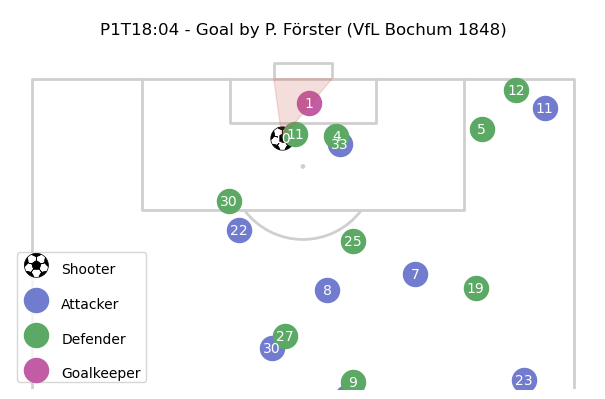

In [32]:
import matplotlib.pyplot as plt
from mplsoccer import VerticalPitch
from kloppy.domain import PositionType

# Setup the pitch
pitch = VerticalPitch(
    half=True, goal_type='box', pad_bottom=-0.2,
    line_color="#cfcfcf",
    line_zorder=1,
    pitch_type="metricasports",
    pitch_length=event_dataset.metadata.pitch_dimensions.pitch_length,
    pitch_width=event_dataset.metadata.pitch_dimensions.pitch_width,
)

# We will use mplsoccer's grid function to plot a pitch with a title axis.
fig, axs = pitch.grid(
    figheight=4, endnote_height=0,  # no endnote
    title_height=0.1, title_space=0.02,
    # Turn off the endnote/title axis. I usually do this after
    # I am happy with the chart layout and text placement
    axis=False,
    grid_height=0.83
)

# Plot the players
goal_scorer = goal_event.player
coordinates = {
  "shooter": {"x": [], "y": []},
  "attacker": {"x": [], "y": []},
  "defender": {"x": [], "y": []},
  "goalkeeper": {"x": [], "y": []},
}
for player, player_coordinates in goal_frame.players_coordinates.items():
    if player == goal_scorer:
        coordinates["shooter"]["x"].append(1-player_coordinates.x)
        coordinates["shooter"]["y"].append(1-player_coordinates.y)
    elif player.starting_position == PositionType.Goalkeeper:
        coordinates["goalkeeper"]["x"].append(1-player_coordinates.x)
        coordinates["goalkeeper"]["y"].append(1-player_coordinates.y)
    elif player.team == goal_scorer.team:
        coordinates["attacker"]["x"].append(1-player_coordinates.x)
        coordinates["attacker"]["y"].append(1-player_coordinates.y)
    else:
        coordinates["defender"]["x"].append(1-player_coordinates.x)
        coordinates["defender"]["y"].append(1-player_coordinates.y)

    # plot the jersey numbers
    pitch.annotate(
        player.jersey_no, (1-player_coordinates.x, 1-player_coordinates.y),
        va='center', ha='center', color='white',
        fontsize=10, ax=axs['pitch']
    )

# Plot the angle to the goal
pitch.goal_angle(coordinates["shooter"]["x"], coordinates["shooter"]["y"] , alpha=0.2, zorder=1.1, color='#cb5a4c', goal='right', ax=axs['pitch'])

# Plot the player coordinates
pitch.scatter(coordinates["shooter"]["x"], coordinates["shooter"]["y"], s=300, marker="football", label='Shooter', ax=axs['pitch'])
pitch.scatter(coordinates["attacker"]["x"], coordinates["attacker"]["y"], s=300, c='#727cce', label='Attacker', ax=axs['pitch'])
pitch.scatter(coordinates["defender"]["x"], coordinates["defender"]["y"], s=300, c='#5ba965', label='Defender', ax=axs['pitch'])
pitch.scatter(coordinates["goalkeeper"]["x"], coordinates["goalkeeper"]["y"], s=300, c='#c15ca5', label='Goalkeeper', ax=axs['pitch'])

# Add a legend
legend = axs['pitch'].legend(loc='lower left', labelspacing=1.5)
for text in legend.get_texts():
    text.set_fontsize(10)
    text.set_va('center')

# Add a title
axs['title'].text(
    0.5, 0.5,
    f'{goal_event.time} - Goal by {goal_event.player} ({goal_event.team})',
    va='center', ha='center', color='black', fontsize=12
)

# Soccer Project Brainstorming

## What would be cool

- Passing network between players
- Determining synergy between players
- Create visualization to show synergy between players, on carries, etc

## What steps to take

1. Data exploration (Pretty much done)
2. Data wrangling (In Progress)
3. Pass Networking/Modeling
4. Visualization

### Wrangling Goals

- Move Metadata to queryable format (polars)
- Decide what data is needed (i.e. match metadata, match event data)
- Created reusable data pipeline (creating extraction functions)

### Modeling/Networking Goals

- Create passing network between players within lineups (for example, higher pass rate = greater synergy)
- How effiecent a player is with the ball (ground covered with pass/carry, security of ball, etc)
- Model to evalute how a lineup is performing based on these metrics

### Visualization Goals

- Pitch synergy map (i.e. players that have good synergy are indicated with warm glow, cool for bad synergy, etc)
  - Note: Sportec only has 7 Bundesliga games with full player tracking, can't use in analysis, maybe for visualization? 
- Radar Chart to visualize a player or lineups strengths/weakness via their features

In [182]:
from kloppy import impect
import polars as pl
import networkx as nx
import matplotlib.pyplot as plt

events = impect.load_open_data(match_id=122840)

C:\Users\Jerem\anaconda3\envs\soccer_env\lib\site-packages\kloppy\_providers\impect.py:88: UserWarning: 

You are about to use IMPECT public data.
By using this data, you are agreeing to the user agreement. 
The user agreement can be found here: https://github.com/ImpectAPI/open-data/blob/main/LICENSE.pdf

  warnings.warn(


In [184]:
# returns period lengths (TODO: CHECK FOR LEGITIMACY OF PERIOD 2 LENGTH)
def extract_periods_metadata(periods_metadata):
    period_1_length = periods_metadata[0].end_timestamp.seconds - periods_metadata[0].start_timestamp.seconds
    period_2_length = periods_metadata[1].end_timestamp.seconds - periods_metadata[1].start_timestamp.seconds
    return {'period_1' : period_1_length, 'period_2' : period_2_length}

# returns teams values
def extract_teams_metadata(teams_metadata):
    team_dict = {}
    for i in range(len(teams_metadata)):
        fields = ['team_id', 'name', 'ground', 'starting_formation', 'formations']
        temp_dict = {field : getattr(teams_metadata[i], field) for field in fields}
        temp_dict['starting_formation'] = temp_dict['starting_formation'].value
        temp_dict_key_mapping = {
            'team_id' : f'team_{i}_id', 
            'name' : f'team_{i}_name', 
            'ground' : f'team_{i}_ground', 
            'starting_formation' : f'team_{i}_starting_formation', 
            'formations' : f'team_{i}_formations'
        }
        temp_dict = {temp_dict_key_mapping.get(k, k) : v for k, v in temp_dict.items()}
        team_dict.update(temp_dict)
    return team_dict

# extracts players dicts
def extract_player_metadata(teams_metadata):
    player_dict = {}
    for i in range(len(teams_metadata)):
        players = teams_metadata[i].players
        temp_dict = {}
        for player in players:
            temp_dict[player.player_id] = player.name
        player_dict[f'roster_{i}'] = temp_dict
    return player_dict

# extracts relevant metadata 
def extract_events_metadata(events_metadata):
    teams_dict = extract_teams_metadata(events_metadata.metadata.teams)
    players_dict = extract_player_metadata(events_metadata.metadata.teams)
    periods_dict = extract_periods_metadata(events_metadata.metadata.periods)

    match_metadata_dict = {}
    for metadata_dict in [teams_dict, players_dict, periods_dict]:
        match_metadata_dict.update(metadata_dict)
    return match_metadata_dict
    

In [186]:
metadata_fields = [attr for attr in dir(events.metadata) if not attr.startswith('__')]
metadata_values = [getattr(events.metadata, field) for field in metadata_fields]
metadata_dict = {field : values for field, values in zip(metadata_fields, metadata_values)}
#metadata_dict
#metadata_df = pl.DataFrame(metadata_dict)
#metadata_df

In [188]:
events_df = (
    events
    .filter(lambda event: event.team is not None)  # Remove events without a team
    .transform(to_orientation="STATIC_HOME_AWAY")
    .filter(lambda event: event.period.id == 1)
    .to_df(engine="polars")
)

events_df.shape

(1601, 22)

In [190]:
pl.Config.set_tbl_rows(20)
events_df.head(20)


event_id,event_type,period_id,timestamp,end_timestamp,ball_state,ball_owning_team,team_id,player_id,coordinates_x,coordinates_y,end_coordinates_x,end_coordinates_y,receiver_player_id,body_part_type,set_piece_type,result,success,is_under_pressure,pass_type,duel_type,goalkeeper_type
str,str,i64,duration[μs],duration[μs],str,str,str,str,f64,f64,f64,f64,str,str,str,str,bool,bool,str,str,str
"""4614761966""","""PASS""",1,0µs,1s 340ms,"""alive""","""432""","""432""","""46957""",0.5,0.5,0.640952,0.547059,"""26476""","""RIGHT_FOOT""","""KICK_OFF""","""COMPLETE""",true,null,null,null,null
"""4614761967""","""GENERIC:RECEPTION""",1,1s 340ms,null,"""alive""","""432""","""432""","""26476""",0.640952,0.547059,null,null,null,null,null,null,null,null,null,null,null
"""4614761968""","""CARRY""",1,1s 340100µs,2s 892ms,"""alive""","""432""","""432""","""26476""",0.640952,0.547059,0.640952,0.547059,null,"""RIGHT_FOOT""",null,"""COMPLETE""",true,null,null,null,null
"""4614761969""","""PASS""",1,2s 891999µs,6s 26999µs,"""alive""","""432""","""432""","""26476""",0.640952,0.547059,0.189524,0.836765,null,"""RIGHT_FOOT""",null,"""INCOMPLETE""",false,null,null,null,null
"""4614761970""","""RECOVERY""",1,6s 27ms,null,"""alive""","""432""","""30""","""4669""",0.189524,0.836765,null,null,null,"""HEAD""",null,null,null,true,null,null,null
"""4614761971""","""PASS""",1,6s 27099µs,6s 762999µs,"""alive""","""432""","""30""","""4669""",0.189524,0.836765,0.320952,0.755882,null,"""HEAD""",null,"""INCOMPLETE""",false,true,"""HEAD_PASS""",null,null
"""4614761972""","""RECOVERY""",1,6s 762999µs,null,"""alive""","""432""","""432""","""46957""",0.320952,0.755882,null,null,null,"""OTHER""",null,null,null,true,null,null,null
"""4614761973""","""CARRY""",1,6s 763099µs,9s 303999µs,"""alive""","""432""","""432""","""46957""",0.320952,0.755882,0.265714,0.823529,null,"""OTHER""",null,"""INCOMPLETE""",false,true,null,null,null
"""4614761974""","""DUEL""",1,9s 304ms,null,"""alive""","""30""","""30""","""7755""",0.265714,0.823529,null,null,null,"""RIGHT_FOOT""",null,"""WON""",true,true,null,"""GROUND""",null


In [192]:
match_metadata_dict = extract_events_metadata(events)
match_metadata_dict

{'team_0_id': '30',
 'team_0_name': 'VfL Wolfsburg',
 'team_0_ground': home,
 'team_0_starting_formation': '4-3-3',
 'team_0_formations': <TimeContainer>,
 'team_1_id': '432',
 'team_1_name': '1. FC Heidenheim 1846',
 'team_1_ground': away,
 'team_1_starting_formation': '4-1-3-2',
 'team_1_formations': <TimeContainer>,
 'roster_0': {'957': 'Yannick Gerhardt',
  '996': 'Koen Casteels',
  '3503': 'Jonas Wind',
  '4669': 'Ridle Baku',
  '7369': 'Mattias Svanberg',
  '7755': 'Vaclav Cerny',
  '13276': 'Sebastiaan Bornauw',
  '13567': 'Joakim Maehle',
  '16789': 'Lovro Majer',
  '27568': 'Maxence Lacroix',
  '29485': 'Cédric Zesiger',
  '30434': 'Pavao Pervan',
  '32706': 'Aster Vranckx',
  '33303': 'Nicolas Cozza',
  '38637': 'Moritz Jenz',
  '49887': 'Tiago Tomás',
  '53653': 'Patrick Wimmer',
  '56370': 'Jakub Kaminski',
  '57263': 'Kevin Paredes',
  '104738': 'Dzenan Pejcinovic'},
 'roster_1': {'1313': 'Jonas Föhrenbach',
  '1443': 'Benedikt Gimber',
  '1457': 'Marnon Busch',
  '10244':

In [194]:
# creates a network based on the frequency of passes (future iterations will attempt to consider pass length, type, time, contest, turnover, etc)
def populate_pass_dict(match_metadata_dict, events):
    # define directed graph, roster dict, df filters
    roster_pass_dict = {
        match_metadata_dict['team_0_id'] : match_metadata_dict['roster_0'],
        match_metadata_dict['team_1_id'] : match_metadata_dict['roster_1']
    }
    pass_events = events.filter(events['event_type'] == 'PASS')

    # Initialize pass dictionaries
    roster_ids = [match_metadata_dict['team_0_id'], match_metadata_dict['team_1_id']]
    for roster_id in roster_ids:
        for player_id in roster_pass_dict[roster_id]:
            roster_pass_dict[roster_id][player_id] = [roster_pass_dict[roster_id][player_id], {}]

    # create initial data dicts
    pass_events = events_df.filter(events_df['event_type'] == 'PASS')

    # map fields to polars ids
    fields_to_index = {
        'ball_owning_team' : 6,
        'team_id' : 7,
        'player_id' : 8,
        'receiver_player_id' : 13,
        'success' : 17
    }
    
    # increment player's pass frequency using cond statements
    for pass_event in pass_events.iter_rows():
        # if player makes a completed pass to a teammate, increment their pass frequency by 1
        if pass_event[13] is not None and pass_event[17]:
            team = pass_event[6]
            player = pass_event[8]
            receiver = pass_event[13]
            
            # check if player exists in team roster
            if player not in roster_pass_dict[team]:
                print(f"Player {player} not found in team {team}")
                continue
            
            #print(roster_pass_dict[team][player][1])
            roster_pass_dict[team][player][1][receiver] = roster_pass_dict[team][player][1].get(receiver, 0) + 1

    return roster_pass_dict

In [196]:
match_metadata_dict = extract_events_metadata(events)
roster_pass_dict = populate_pass_dict(match_metadata_dict, events_df)
roster_pass_dict

Player 29485 not found in team 432
Player 29485 not found in team 432


{'30': {'957': ['Yannick Gerhardt',
   {'13567': 4, '16789': 2, '27568': 3, '29485': 3, '7369': 2, '4669': 1}],
  '996': ['Koen Casteels',
   {'957': 2, '29485': 6, '13567': 1, '27568': 4, '4669': 4}],
  '3503': ['Jonas Wind',
   {'4669': 1, '16789': 1, '29485': 1, '7369': 1, '13567': 2}],
  '4669': ['Ridle Baku',
   {'996': 3,
    '957': 3,
    '7369': 5,
    '27568': 6,
    '7755': 6,
    '3503': 2,
    '13567': 1}],
  '7369': ['Mattias Svanberg',
   {'7755': 4, '957': 2, '4669': 4, '16789': 2, '27568': 1, '3503': 2}],
  '7755': ['Vaclav Cerny',
   {'16789': 2, '4669': 2, '27568': 1, '7369': 1, '3503': 1}],
  '13276': ['Sebastiaan Bornauw', {}],
  '13567': ['Joakim Maehle',
   {'3503': 4, '53653': 3, '16789': 5, '29485': 15, '27568': 1, '7369': 1}],
  '16789': ['Lovro Majer',
   {'7755': 4,
    '53653': 1,
    '4669': 1,
    '7369': 2,
    '27568': 1,
    '13567': 1,
    '957': 2,
    '29485': 2,
    '3503': 1,
    '996': 1}],
  '27568': ['Maxence Lacroix',
   {'29485': 20, '4669': 6

In [198]:
event_types = df['event_type'].to_list()
event_types = set(event_types)
#event_types

NameError: name 'df' is not defined

In [206]:
team_network_ids = {
    '30' : ['VfL Wolfsburg', nx.DiGraph()],
    '432' : ['1. FC Heidenheim 1846', nx.DiGraph()]
}

# TODO: Iterate through pass_dict and create network based on frequency
# create pass network for individual teams
def create_pass_network(roster_pass_dict, team_network_ids):
    DG_dict = {}
    for team_network in team_network_ids.items():
        team_id = team_network[0]
        team_name = team_network[1][0]
        team_DG = team_network[1][1]
        pass_list = []
        for roster in roster_pass_dict[team_id].items():
            passer_id = roster[0]
            print(passer_id)
            passer_name = roster[1][0]
            print(passer_name)
            passer_passes = roster[1][1]
            print(passer_passes)
            for receiver_id, pass_freq in passer_passes.items():
                #print(receiver_id, pass_freq)
                pass_list.append((passer_id, receiver_id, pass_freq))
        team_DG.add_weighted_edges_from(pass_list)
        DG_dict[team_id] = team_DG
    return DG_dict
pass_network_dict = create_pass_network(roster_pass_dict, team_network_ids)
pass_network_dict

957
Yannick Gerhardt
{'13567': 4, '16789': 2, '27568': 3, '29485': 3, '7369': 2, '4669': 1}
996
Koen Casteels
{'957': 2, '29485': 6, '13567': 1, '27568': 4, '4669': 4}
3503
Jonas Wind
{'4669': 1, '16789': 1, '29485': 1, '7369': 1, '13567': 2}
4669
Ridle Baku
{'996': 3, '957': 3, '7369': 5, '27568': 6, '7755': 6, '3503': 2, '13567': 1}
7369
Mattias Svanberg
{'7755': 4, '957': 2, '4669': 4, '16789': 2, '27568': 1, '3503': 2}
7755
Vaclav Cerny
{'16789': 2, '4669': 2, '27568': 1, '7369': 1, '3503': 1}
13276
Sebastiaan Bornauw
{}
13567
Joakim Maehle
{'3503': 4, '53653': 3, '16789': 5, '29485': 15, '27568': 1, '7369': 1}
16789
Lovro Majer
{'7755': 4, '53653': 1, '4669': 1, '7369': 2, '27568': 1, '13567': 1, '957': 2, '29485': 2, '3503': 1, '996': 1}
27568
Maxence Lacroix
{'29485': 20, '4669': 6, '7369': 3, '957': 4, '7755': 2, '996': 3}
29485
Cédric Zesiger
{'27568': 14, '13567': 16, '3503': 1, '16789': 7, '996': 4, '53653': 3, '957': 1}
30434
Pavao Pervan
{}
32706
Aster Vranckx
{}
33303
Nic

{'30': <networkx.classes.digraph.DiGraph at 0x2a242477340>,
 '432': <networkx.classes.digraph.DiGraph at 0x2a2424772e0>}

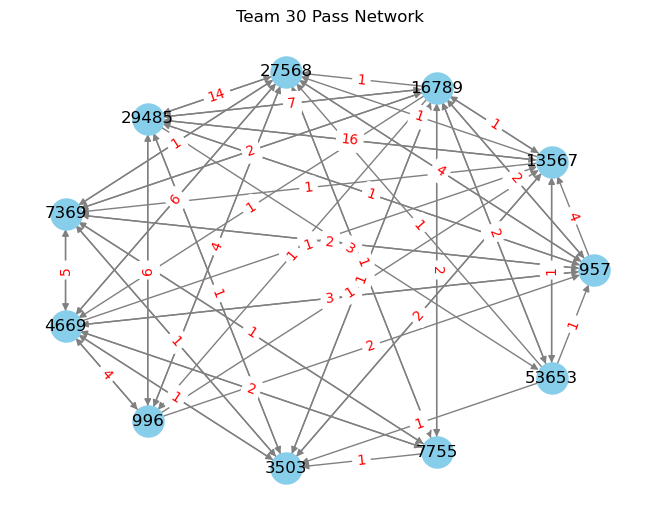

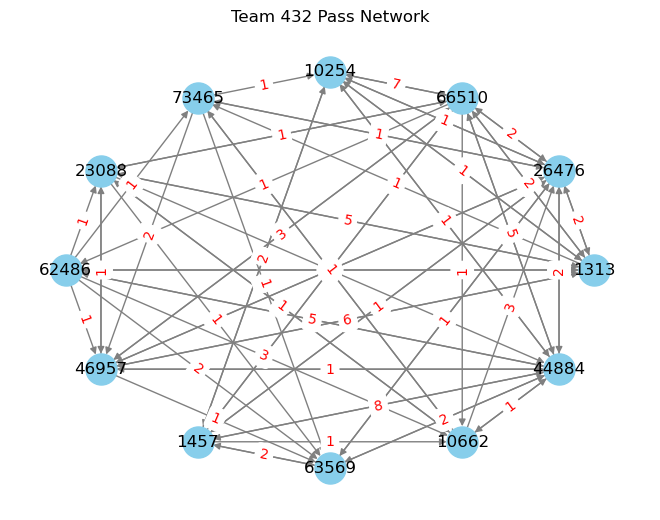

In [212]:
# draws a team's pass network
def draw_pass_network(pass_network, team_id):
    # decides layout for nodes
    DG = pass_network
    pos = nx.circular_layout(DG)
    
    # draws graph components
    nx.draw(DG, pos, with_labels=True, node_color='skyblue', node_size=500, edge_color='gray')
    
    # adds pass freq as edge weights
    edge_labels = nx.get_edge_attributes(DG, 'weight')
    
    # draws edge weights
    nx.draw_networkx_edge_labels(DG, pos, edge_labels=edge_labels, font_color='red')
    
    #plt.figure(figsize=(12, 10))
    
    # displays plot
    plt.title(f"Team {team_id} Pass Network")
    plt.axis('off') # Turn off the axis ticks
    plt.show()

#draw_pass_network(pass_network_dict['30'])
for team_id, team_network in pass_network_dict.items():
    draw_pass_network(pass_network_dict[team_id], team_id)

In [45]:
DG = nx.DiGraph()
DG.add_weighted_edges_from([('Baku', 'Messi', 0.5), ('Pele', 'Messi', 0.75)])
DG.out_degree('Messi', weight='weight')

0

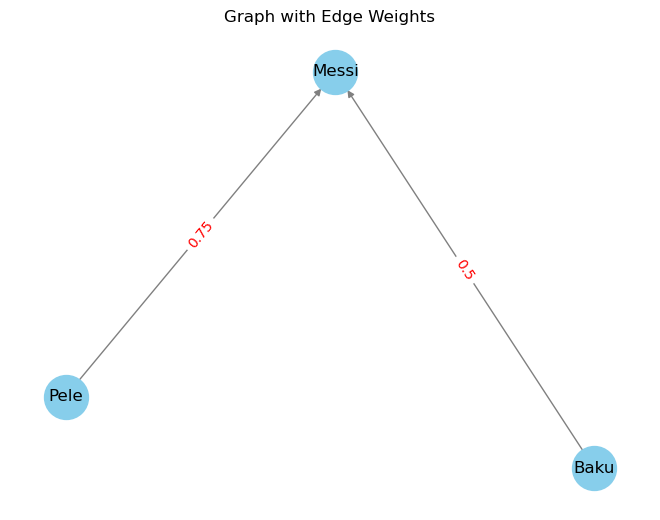

In [47]:
import matplotlib.pyplot as plt

pos = nx.spring_layout(DG) # positions for all nodes

# 3. Draw the graph components
nx.draw(DG, pos, with_labels=True, node_color='skyblue', node_size=1000, edge_color='gray')

# 4. Extract the edge weights into a dictionary
# The keys should be the edge tuples (u, v), and values should be the weights
edge_labels = nx.get_edge_attributes(DG, 'weight')

# 5. Draw the edge labels
nx.draw_networkx_edge_labels(DG, pos, edge_labels=edge_labels, font_color='red')

# 6. Display the plot
plt.title("Graph with Edge Weights")
plt.axis('off') # Turn off the axis ticks
plt.show()